In [92]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static
import folium
from folium.plugins import MarkerCluster
from streamlit_folium import folium_static


## Data Understanding

In [93]:
# Load data
file_path = "original_table.csv"
df = pd.read_csv(file_path)

In [94]:
# Menampilkan lima baris pertama dataset
df.head()

,Desa,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Latitude,Longitude
0,Nangerang,1801,1957,2058,2057,2317,2086,2086,2044,2097,2144,2144,2092,-6.6971,107.5357
1,Simpang,1905,1897,1953,1943,1897,1896,1896,1925,1891,2020,2020,1934,-6.6828,107.5402
2,Sakambang,1401,1596,1630,1641,1583,1583,1583,1498,1592,1567,1570,1496,-6.7110,107.5402
3,Nagrog,3342,2343,2353,2542,2524,2417,2417,2415,2429,2580,2580,2412,-6.7132,107.5520
4,Cibuntu,1427,1444,1469,1524,1574,1574,1574,1571,1622,1642,1640,1605,-6.7079,107.5550


In [95]:
# Informasi umum tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Desa       15 non-null     object 
 1   2011       15 non-null     int64  
 2   2012       15 non-null     int64  
 3   2013       15 non-null     int64  
 4   2014       15 non-null     int64  
 5   2015       15 non-null     int64  
 6   2016       15 non-null     int64  
 7   2017       15 non-null     int64  
 8   2018       15 non-null     int64  
 9   2019       15 non-null     int64  
 10  2020       15 non-null     int64  
 11  2021       15 non-null     int64  
 12  2022       15 non-null     int64  
 13  Latitude   15 non-null     float64
 14  Longitude  15 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 1.9+ KB


In [96]:
# Statistik deskriptif untuk data numerik
df.describe()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Latitude,Longitude
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000
mean,2594.733333,2646.466667,2726.066667,2847.533333,2843.866667,2793.333333,2793.333333,2720.666667,2802.266667,2886.866667,2886.933333,2779.000000,-6.673887,107.54342
std,1054.595215,1092.806012,1102.804119,1174.340111,1167.274228,1105.719201,1105.719201,1062.505373,1103.831733,1168.255040,1167.591383,1114.849702,0.032853,0.01559
min,1269.000000,1347.000000,1354.000000,1414.000000,1419.000000,1384.000000,1384.000000,1440.000000,1469.000000,1500.000000,1500.000000,1475.000000,-6.713200,107.52240
25%,1698.500000,1768.500000,1819.000000,1795.500000,1823.000000,1810.500000,1810.500000,1822.000000,1800.500000,1848.000000,1850.000000,1854.000000,-6.702400,107.53275
50%,2557.000000,2516.000000,2796.000000,2887.000000,2895.000000,2958.000000,2958.000000,2621.000000,2553.000000,2771.000000,2770.000000,2684.000000,-6.681200,107.54020
75%,3280.000000,3166.000000,3365.500000,3668.000000,3574.000000,3616.500000,3616.500000,3478.500000,3626.500000,3729.500000,3730.000000,3533.000000,-6.650500,107.55350
max,5003.000000,5386.000000,5399.000000,5533.000000,5705.000000,5217.000000,5217.000000,5191.000000,5204.000000,5573.000000,5570.000000,5486.000000,-6.610300,107.57120


In [97]:
# Menampilkan nilai unik untuk setiap kolom
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:", unique_values)


Unique values for Desa: ['Nangerang' 'Simpang' 'Sakambang' 'Nagrog' 'Cibuntu' 'Sumurugul'
 'Raharja' 'Wanayasa' 'Babakan' 'Wanasari' 'Legokhuni' 'Ciawi' 'Sukadami'
 'Taringgul Tonggoh' 'Taringgul Tengah']
Unique values for 2011: [1801 1905 1401 3342 1427 1596 1269 5003 3279 3281 2204 2557 3199 3211
 3446]
Unique values for 2012: [1957 1897 1596 2343 1444 1640 1347 5386 3831 3053 2516 2913 3117 3442
 3215]
Unique values for 2013: [2058 1953 1630 2353 1469 1685 1354 5399 3847 3281 2796 2911 3450 3491
 3214]
Unique values for 2014: [2057 1943 1641 2542 1524 1648 1414 5533 3876 3789 2887 2981 3547 3483
 3848]
Unique values for 2015: [2317 1897 1583 2524 1574 1749 1419 5705 3875 3792 2895 2969 3581 3567
 3211]
Unique values for 2016: [2086 1896 1583 2417 1574 1725 1384 5217 3860 3789 2958 2967 3616 3617
 3211]
Unique values for 2017: [2086 1896 1583 2417 1574 1725 1384 5217 3860 3789 2958 2967 3616 3617
 3211]
Unique values for 2018: [2044 1925 1498 2415 1571 1719 1440 5191 3496 3431 2621 2

In [98]:
# Visualisasi data
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

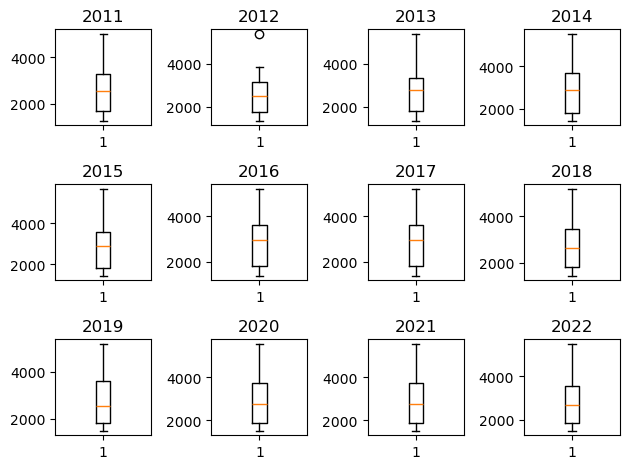

In [99]:
# Box plot untuk setiap tahun
for year in range(2011, 2023):
    plt.subplot(3, 4, year - 2010)
    plt.boxplot(df[str(year)])
    plt.title(str(year))

    plt.tight_layout()
plt.show()

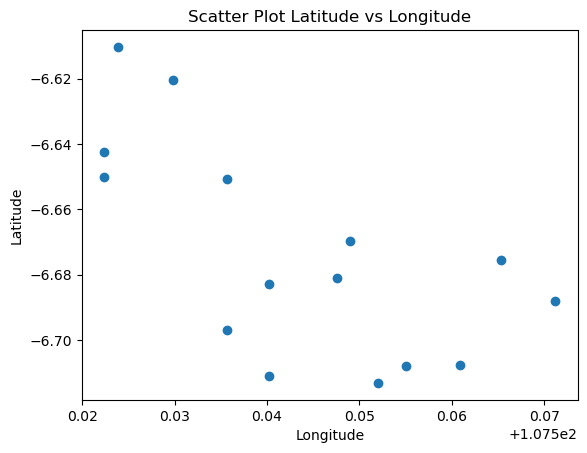

In [100]:
# Scatter plot antara Latitude dan Longitude
plt.scatter(df['Longitude'], df['Latitude'])
plt.title('Scatter Plot Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Data Preparation

In [101]:
# Menghilangkan kolom Desa, Latitude, dan Longitude dari dataset untuk normalisasi
data_for_normalization = df.drop(['Desa', 'Latitude', 'Longitude'], axis=1)

In [102]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data_for_normalization)

In [103]:
# Membuat DataFrame baru dengan data yang sudah dinormalisasi
df_normalized = pd.DataFrame(normalized_data, columns=data_for_normalization.columns)

In [104]:
# Menambahkan kembali kolom Desa, Latitude, dan Longitude
df_normalized[['Desa', 'Latitude', 'Longitude']] = df[['Desa', 'Latitude', 'Longitude']]

In [105]:
# Menampilkan lima baris pertama dari dataset yang sudah dinormalisasi
df_normalized.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Desa,Latitude,Longitude
0,-0.779059,-0.653058,-0.627051,-0.696800,-0.467207,-0.662157,-0.662157,-0.659212,-0.661351,-0.658195,-0.658629,-0.637855,Nangerang,-6.6971,107.5357
1,-0.676982,-0.709890,-0.725605,-0.797283,-0.839649,-0.840022,-0.840022,-0.775143,-0.854524,-0.768062,-0.768558,-0.784552,Simpang,-6.6828,107.5402
2,-1.171664,-0.994995,-1.028775,-1.063474,-1.118093,-1.133031,-1.133031,-1.191128,-1.134906,-1.169429,-1.167494,-1.191220,Sakambang,-6.7110,107.5402
3,0.733452,-0.287442,-0.350163,-0.269306,-0.283647,-0.352297,-0.352297,-0.297782,-0.350024,-0.271890,-0.272104,-0.340746,Nagrog,-6.7132,107.5520
4,-1.146145,-1.138968,-1.179890,-1.166602,-1.126074,-1.141456,-1.141456,-1.120011,-1.106774,-1.102978,-1.105437,-1.090017,Cibuntu,-6.7079,107.5550


## Modeling

In [106]:
# Pilih jumlah klaster
num_clusters = 10

In [107]:
# Kolom untuk pengelompokan (2011-2022)
kolom_pengelompokan = [str(tahun) for tahun in range(2012, 2022)]

In [108]:
# Klaster dengan KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
df["Cluster"] = kmeans.fit_predict(df[kolom_pengelompokan])

/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [109]:
# Menampilkan hasil klaster di dataset
df.head()

,Desa,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Latitude,Longitude,Cluster
0,Nangerang,1801,1957,2058,2057,2317,2086,2086,2044,2097,2144,2144,2092,-6.6971,107.5357,6
1,Simpang,1905,1897,1953,1943,1897,1896,1896,1925,1891,2020,2020,1934,-6.6828,107.5402,6
2,Sakambang,1401,1596,1630,1641,1583,1583,1583,1498,1592,1567,1570,1496,-6.7110,107.5402,8
3,Nagrog,3342,2343,2353,2542,2524,2417,2417,2415,2429,2580,2580,2412,-6.7132,107.5520,7
4,Cibuntu,1427,1444,1469,1524,1574,1574,1574,1571,1622,1642,1640,1605,-6.7079,107.5550,8


In [110]:
# List untuk menyimpan inertia (within-cluster sum of squares) dari KMeans
inertias = []

In [111]:
# Coba jumlah klaster dari 1 hingga num_clusters
for k in range(1, num_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[kolom_pengelompokan])
    inertias.append(kmeans.inertia_)

/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

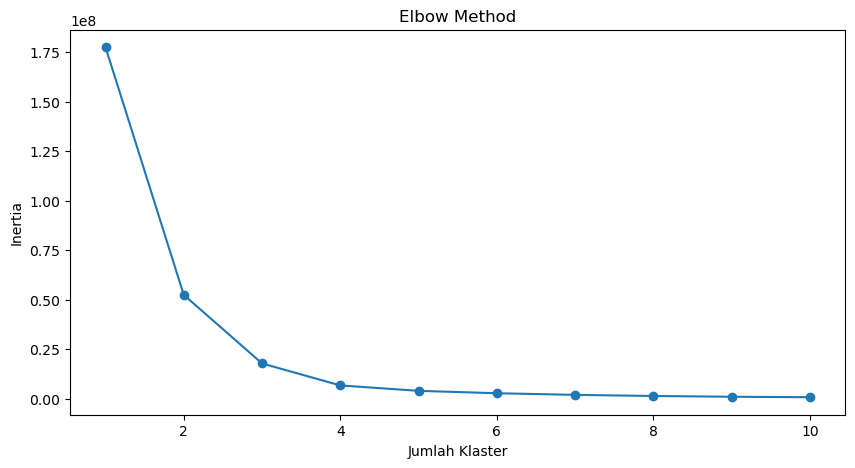

In [112]:
# Menampilkan grafik Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_clusters + 1), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.show()

In [116]:
# Membuat peta dengan lokasi rata-rata latitude dan longitude
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

# Menambahkan marker cluster
marker_cluster = MarkerCluster().add_to(m)

# Menambahkan penanda untuk setiap klaster
for i, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Klaster {row['Cluster'] + 1}: {row['Desa']}").add_to(marker_cluster)


In [117]:
m

## EVALUASI

In [57]:
# List untuk menyimpan inertia (within-cluster sum of squares) dari KMeans
inertias = []

In [58]:
# Coba jumlah klaster dari 1 hingga 10
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df[kolom_pengelompokan])

/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

In [71]:
 # Menyimpan inertia
inertias.append(kmeans.inertia_)

In [72]:
# List untuk menyimpan silhouette score
silhouette_scores = []

In [73]:
# Coba jumlah klaster dari 1 hingga 10
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(df[kolom_pengelompokan])

/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

In [74]:
  # Menyimpan inertia
inertias.append(kmeans.inertia_)

In [75]:
    # Menyimpan silhouette score
if num_clusters > 1:
        silhouette_avg = silhouette_score(df[kolom_pengelompokan], kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

In [76]:
# Menampilkan grafik Elbow Method untuk memilih jumlah klaster
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

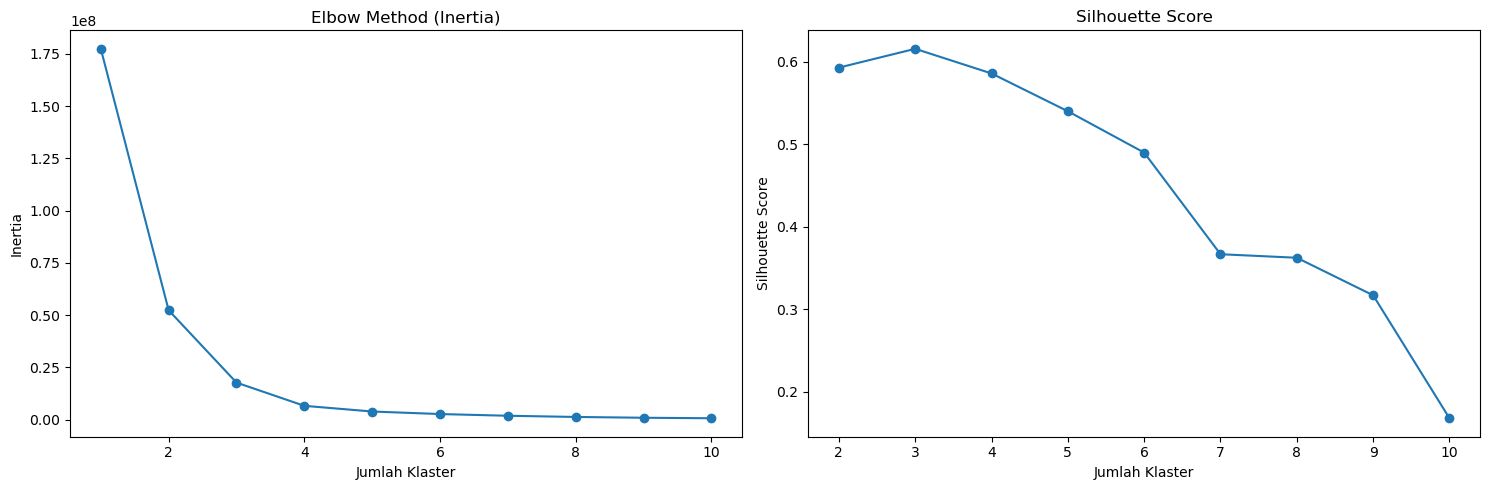

In [86]:
# Menampilkan grafik Elbow Method untuk memilih jumlah klaster
plt.figure(figsize=(15, 5))

# Subplot 1: Inertia
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')

# Subplot 2: Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [90]:
# Data yang digunakan (X_scaled adalah data yang sudah dinormalisasi)
X_scaled = df_normalized.drop(['Desa', 'Latitude', 'Longitude'], axis=1)

# List untuk menyimpan nilai silhouette score
silhouette_scores = []

# Range jumlah klaster yang akan dicoba
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9,10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(X_scaled)

    # Mendapatkan label klaster untuk setiap data point
    cluster_labels = kmeans.labels_

    # Menghitung silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Menyimpan nilai silhouette score
    silhouette_scores.append(silhouette_avg)

    print("For n_clusters = {0}, the silhouette score is {1:.2f}".format(num_clusters, silhouette_avg))


/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

For n_clusters = 2, the silhouette score is 0.59
For n_clusters = 3, the silhouette score is 0.60
For n_clusters = 4, the silhouette score is 0.56
For n_clusters = 5, the silhouette score is 0.52
For n_clusters = 6, the silhouette score is 0.50
For n_clusters = 7, the silhouette score is 0.36


/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8, the silhouette score is 0.34
For n_clusters = 9, the silhouette score is 0.29
For n_clusters = 10, the silhouette score is 0.31


/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/andy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
